<a href="https://colab.research.google.com/github/kakyungkim/aiffel/blob/main/time_series_mini_project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 10-6. 프로젝트 : Finance Time Series 데이터 활용하기

**프로젝트 요약**

--------------------------------
1. 프로젝트 : Data Labeling
2. 프로젝트 : Feature Engineering
3. 프로젝트 : Model Training
--------------------------------

이번 노드에서 프로젝트는 총 3가지로 구성되어있습니다. Data Labeling 방법과 Feature Engineering 방법에 대해 생각해보며 model training을 통해 성능을 개선시켜봅시다.

- 프로젝트 1, 2를 정상적인 흐름대로 진행하기
- 프로젝트 3에서 다양한 방법을 사용하여 기존의 결과와 비교 분석 시도하기
- 다양한 방법을 사용하여 성능향상을 시도하기
앞에서 했던 내용을 기억하면서 코드를 작성해봅시다.

### 1. 프로젝트 : Data Labeling
위에서 배운 Data Labeling 4가지를 직접 적용해봅시다.

① Price Change Direction 적용하기<br>
② Using Moving Average 적용하기<br>
③ Local Min-Max 적용하기<br>
④ Trend Scanning 적용하기

--------------------------------
앞에서 진행한 Data Labeling 방법은 4가지가 있었습니다.

먼저 필요한 라이브러리 및 패키지를 확인 후 실행합니다. 다음은 데이터가 저장된 경로에서 데이터를 불러온 뒤 필요한 부분을 확인하기 위해 시각화를 진행합니다.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# 데이터 경로
# # DATA_PATH = '/aiffel/aiffel/fnguide/data/'
# DATA_PATH = '/aiffel/aiffel/08_time_series/fnguide/'
DATA_PATH = '/content/gdrive/MyDrive/aiffel/08_time_series/fnguide/'

Mounted at /content/gdrive


<Axes: xlabel='time'>

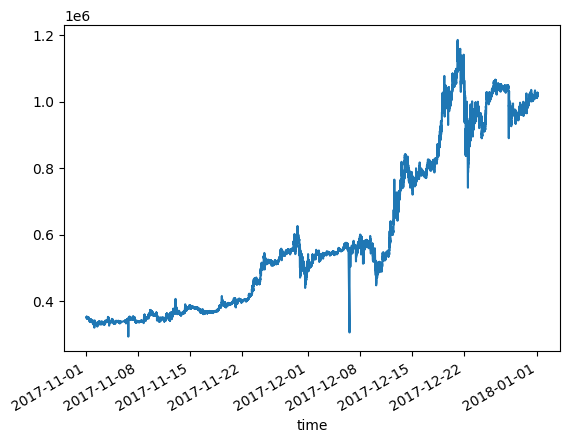

In [2]:
# 데이터 불러오기
modify_data = pd.read_csv(os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv'), index_col=0, parse_dates=True)

# 불러온 데이터 시각화하기
modify_data.loc['2017-11-01':'2017-12-31','close'].plot()

#### ① Price Change Direction 적용하기
아래의 수식을 적용하여 momentum_signal을 만들어봅시다. 그리고 기존의 데이터(modify_data)와 수식이 적용된 데이터(momentum_signal)를 시각화하여 어떤 차이가 있는지 비교해봅시다.
$$Label\quad i(t)=\left\{\begin{matrix}
1,if \quad price_t - price_{t-n}>0 \\
0, if \quad else \quad\quad\quad\quad\quad\quad
\end{matrix}\right.$$

먼저 window를 설정합니다. 보통 window는 시계열 데이터에서 이전 시점과 현재 시점간의 간격을 구간별로 잘라서 사용하곤 합니다. 이렇게 사용하는 이유는 정확한 예측을 달성하기 위해 우리가 가지고 있는 정보를 과거로부터 주어진 시점에서 가능한 안전하게 보존된 정보를 모델에 제공하기 위해 Window로 다시 구성한 다음 모델에 input으로 주입하는 것입니다. window는 보통 time series data 외에도 많이 사용하는 기법입니다.(ex. 정렬 알고리즘, CNN의 sliding 등...)
![image.png](attachment:image.png)
[https://docs.wavefront.com/query_language_windows_trends.html]

In [3]:
# Q. 코드를 작성해주세요

# window 지정
# window = #[[YOUR CODE]] # 앞서 사용한 window의 값은 10입니다.
window = 10

# momentum_signal 만들기
# momentum_signal = np.sign(np.sign('[[YOUR CODE]]') + 1) # modify_data['close'].shift(window)활용
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].shift(window)) + 1)

# s_momentum_signal 만들기
# s_momentum_signal = #[[YOUR CODE]] # 데이터 활용을 위해 pd.Series를 사용합니다.
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

기존의 데이터(modify_data)에서 필요한 close(종가)를 가져오고 수식이 적용된 데이터(s_momentum_signal)의 종가와 얼마나 차이가 있는지 확인하기 위해 데이터를 변환하고 시각화합니다.

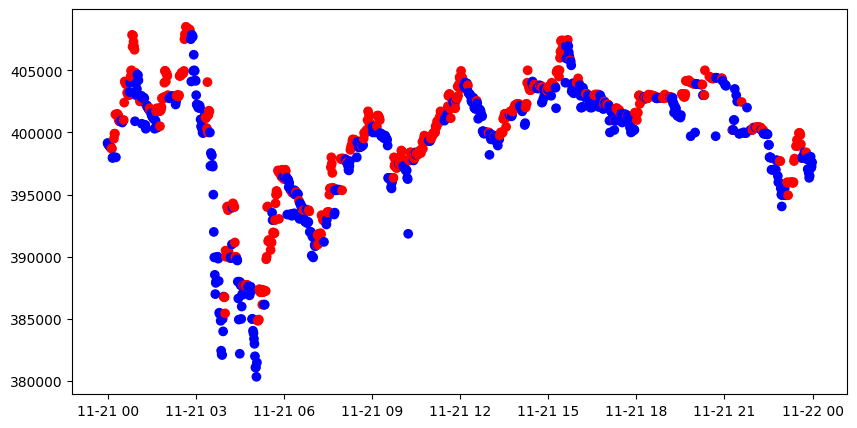

In [4]:
# Q. 코드를 작성해주세요

# 기존 데이터 만들기
# sub_data = #[[YOUR CODE]] # loc를 활용하여 2017-11-21부터 close(종가)까지 가져오기
sub_data = modify_data.loc['2017-11-21', 'close']

# 수식 적용된 데이터 만들기
# c_sig = #[[YOUR CODE]] # loc를 활용하여 2017-11-21의 시간대별 값을 가져오기
c_sig = s_momentum_signal.loc['2017-11-21']

# 두 데이터의 비교를 위한 색상 바꾸기
# c_sig['color'] = #[[YOUR CODE]] # np.where 사용
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

# 시각화하기
#[[YOUR CODE]]
plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

#### ② Using Moving Average 적용하기
앞서 사용했던 이동평균선을 이용한 방식을 적용해봅시다. 수식은 아래과 같습니다.
$$Label\quad i(t)=\left\{\begin{matrix}
1,if \quad price_t>MA(t ... t-n) \\
0, if \quad else \quad\quad\quad\quad\quad\quad\quad
\end{matrix}\right.$$

In [5]:
# Q. 코드를 작성해주세요

# momentum_signal
# momentum_signal = np.sign(np.sign('[[YOUR CODE]]') + 1) # modify_data['close'].rolling(window).mean() 활용
momentum_signal = np.sign(np.sign(modify_data['close'] - modify_data['close'].rolling(window).mean()) + 1)

# s_momentum_signal
# s_momentum_signal = #[[YOUR CODE]] # pd.Series로 변환
s_momentum_signal = pd.Series(momentum_signal, index=modify_data.index)

앞서 "① Price Change Direction 적용하기"에서 진행했던 것처럼 시각화를 위해 Using Moving Average 수식을 적용한 것과 비교하기 위해 데이터를 변환하여 시각화를 통해 확인합니다.

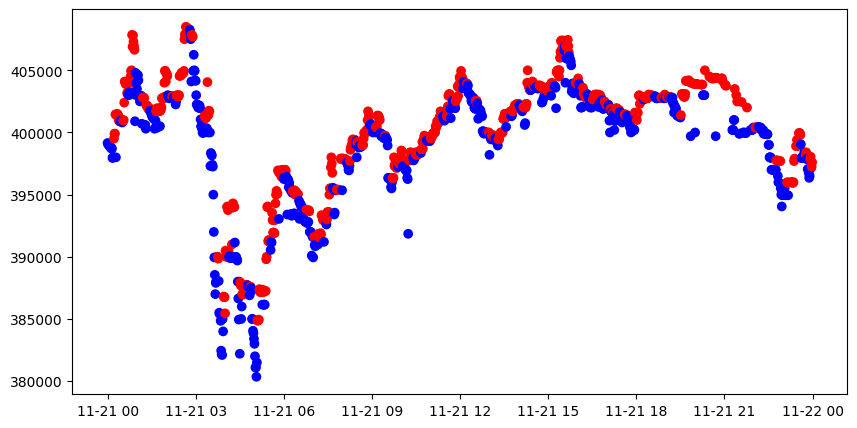

In [6]:
# Q. 코드를 작성해주세요

# 기존 데이터 만들기
#[[YOUR CODE]]
sub_data = modify_data.loc['2017-11-21', 'close']

# 수식 적용된 데이터 만들기
#[[YOUR CODE]]
c_sig = s_momentum_signal.loc['2017-11-21']

# 두 데이터의 비교를 위한 색상 바꾸기
#[[YOUR CODE]]
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

# 시각화하기
#[[YOUR CODE]]
plt.figure(figsize=(10,5))
plt.scatter(sub_data.index, sub_data, c=c_sig['color'])

#### ③ Local Min-Max 적용하기

---------------------------------
최소 - 최대 구간을 이어나가며 Labeling하는 함수를 아래 수도코드(pseudo-code)를 보고 만들어봅시다.

①~⑦까지 코드를 자세히 들여다보고 어떠한 방식으로 코드가 동작되는지 뜯어봅시다.
⑧ return 값은 dictionary 형태로 2개의 DataFrame이 반환되어야합니다.

In [7]:
# Q. 코드를 작성해주세요

# Local min / max 를 추출하기 위한 함수
def get_local_min_max(close, wait=3):
    min_value = close.iloc[0]
    # max_value = #[[YOUR CODE]] # ①
    max_value = close.iloc[0]
    n_cnt_min, n_cnt_max = 0, 0

    mins, maxes = [], []
    min_idxes, max_idxes = [], []
    b_min_update, b_max_update = False, False

    for idx, val in zip(close.index[1:], close.values[1:]):
        if val < min_value:
            min_value = val
            mins.append(min_value)
            min_idxes.append(idx)
            n_cnt_min = 0
            b_min_update = True
        if val > max_value:
            # max_value = # [[YOUR CODE]] # ②
            max_value = val
            # [[YOUR CODE]]  # ③
            maxes.append(max_value)
            max_idxes.append(idx)
            n_cnt_max = 0
            # b_max_update = # [[YOUR CODE]] # ④
            b_max_update = True

        if not b_max_update:
            b_min_update = False
            n_cnt_min += 1
            if n_cnt_min >= wait:
                max_value = min_value
                n_cnt_min = 0

        if not b_min_update:
            # b_max_update = # [[YOUR CODE]] # ⑤
            b_max_update = False
            # [[YOUR CODE]] # ⑥
            n_cnt_max += 1
            if n_cnt_max >= wait:
                #min_value = # [[YOUR CODE]] # ⑦
                min_value = max_value
                n_cnt_max = 0

    # return # [[YOUR CODE]] # ⑧
    return pd.DataFrame.from_dict({'min_time': min_idxes, 'local_min': mins}), pd.DataFrame.from_dict({'max_time': max_idxes, 'local_max': maxes})

get_local_min_max 함수를 사용하면 return 값이 2개가 나오게 됩니다. 아래 주석을 제거하여 min과 maxes의 값이 어떻게 나오는지 확인해봅시다.

In [8]:
# Local mins, maxes를 확인
mins, maxes = get_local_min_max(sub_data, wait=3)

# mins, maxes 확인
print(mins)
print('--'*20)
print(maxes)

               min_time  local_min
0   2017-11-21 00:01:00     399050
1   2017-11-21 00:03:00     399000
2   2017-11-21 00:04:00     398900
3   2017-11-21 00:05:00     398850
4   2017-11-21 00:06:00     398800
..                  ...        ...
472 2017-11-21 23:48:00     397850
473 2017-11-21 23:50:00     397050
474 2017-11-21 23:52:00     396750
475 2017-11-21 23:53:00     396350
476 2017-11-21 23:59:00     397600

[477 rows x 2 columns]
----------------------------------------
               max_time  local_max
0   2017-11-21 00:13:00     399500
1   2017-11-21 00:14:00     399900
2   2017-11-21 00:16:00     401450
3   2017-11-21 00:19:00     401350
4   2017-11-21 00:20:00     401500
..                  ...        ...
268 2017-11-21 23:41:00     398050
269 2017-11-21 23:43:00     398400
270 2017-11-21 23:46:00     398200
271 2017-11-21 23:47:00     398400
272 2017-11-21 23:56:00     398050

[273 rows x 2 columns]


(376546.5, 412585.0)

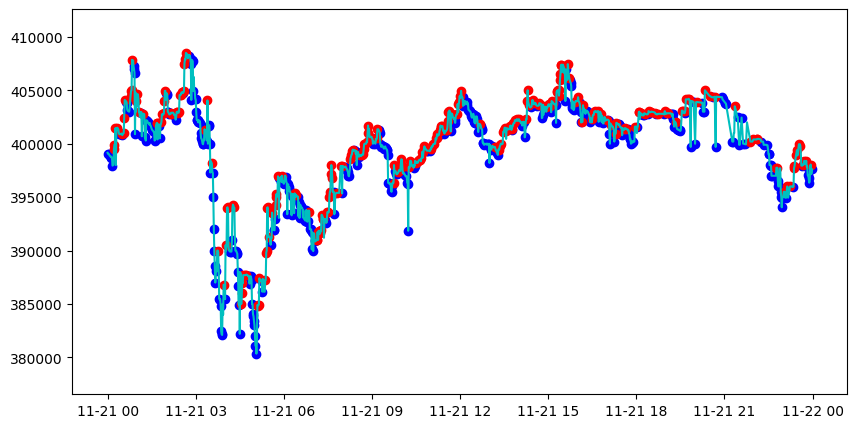

In [9]:
# Q. 코드를 작성해주세요

# subplots 및 plot 생성
# fig, ax = #[[YOUR CODE]]
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(sub_data, 'c')

# min_time, local_min을 활용한 scatter plot 생성
#[[YOUR CODE]]
ax.scatter(mins.min_time, mins.local_min, c='blue')

# maxes_time, local_max를 활용한 scatter plot 생성
#[[YOUR CODE]]
ax.scatter(maxes.max_time, maxes.local_max, c='red')

# y축 설정
ax.set_ylim([sub_data.min() * 0.99, sub_data.max()  * 1.01])

#### ④ Trend Scanning 적용하기

------------------------------
Trend Scanning을 구현해봅시다.
$$x_{t+1}=\beta_0+\beta_1*1+\epsilon_{t+1}$$
$$t\hat{{_\beta{_1}}}=\frac{\beta_1}{\sigma\beta_1}$$
$$Label\quad i(t)=\left\{\begin{matrix}
1,if \quad max \quad t\hat{{_\beta{_1}}}>0 \\
0, if \quad else \quad\quad\quad\quad
\end{matrix}\right.$$
OLS는 회귀분석을 하는 경우 유용하게 사용할 수 있으며 아래 함수에서 ols.tvalue를 통해 t-value값을 사용할 수 있는 함수를 활용하여 추세(trend)를 추정합니다.

In [10]:
def t_val_lin_r(close):
    import statsmodels.api as sml

    # t-value from a linear trend
    x = np.ones((close.shape[0], 2))
    x[:, 1] = np.arange(close.shape[0])
    ols = sml.OLS(close, x).fit()
    return ols.tvalues[1]

In [11]:
look_forward_window = 60
min_sample_length = 5
step = 1
t1_array = []
t_values_array = []

In [12]:
# Q. 코드를 작성해주세요

# 이 코드 블럭은 실행에 20-30분정도가 소요될 수 있습니다.

molecule = modify_data['2017-11-01':'2017-11-30'].index
label = pd.DataFrame(index=molecule, columns=['t1', 't_val', 'bin'])
tmp_out = []

for ind in tqdm(molecule):
    subset = modify_data.loc[ind:, 'close'].iloc[:look_forward_window]  # 전방 탐색을 위한 샘플 추출
    if look_forward_window > subset.shape[0]:
        continue

    tmp_subset = pd.Series(index=subset.index[min_sample_length-1:subset.shape[0]-1])
    tval = []

    # 회귀분석을 통해 t 통계량값을 이용하여 추세 추정
    for forward_window in np.arange(min_sample_length, subset.shape[0]):
        df = subset.iloc[:forward_window]
        # tval.append("[[YOUR CODE]]")  # t-value 사용
        tval.append(t_val_lin_r(df.values))

    tmp_subset.loc[tmp_subset.index] = np.array(tval)
    idx_max = tmp_subset.replace([-np.inf, np.inf, np.nan], 0).abs().idxmax()
    tmp_t_val = tmp_subset[idx_max]
    tmp_out.append([tmp_subset.index[-1], tmp_t_val, np.sign(tmp_t_val)])

# label.loc[molecule] = np.array("[[YOUR CODE]]")  # prevent leakage
label.loc[molecule] = np.array(tmp_out)  # prevent leakage

label['t1'] = pd.to_datetime(label['t1'])
label['bin'] = pd.to_numeric(label['bin'], downcast='signed')

100%|██████████| 33384/33384 [17:20<00:00, 32.07it/s]


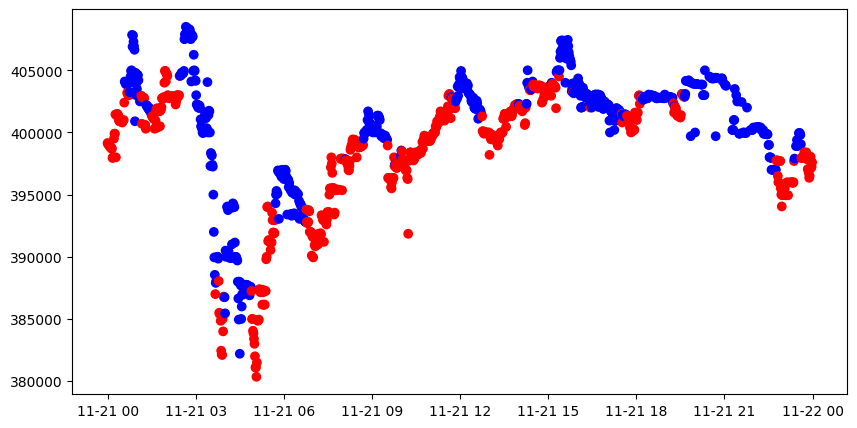

In [13]:
# 시각화
sub_data = modify_data.loc['2017-11-21', 'close']
c_sig = label['bin'].loc['2017-11-21']
c_sig['color'] = np.where(c_sig == 1, 'red', 'blue')

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(sub_data.index, sub_data.values, c=c_sig['color'])

### 2. 프로젝트 : Feature Engineering

-------------------------------------
① 환경구성 및 데이터 불러오기<br>
② Technical Index 적용하기<br>
③ Feature Selection methods 적용하기

-------------------------------------
#### ① 환경구성 및 데이터 불러오기

-------------------------------------
환경구성 및 데이터를 불러옵니다.

In [14]:
!pip install ta==0.9.0
!pip install shap

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.9.0-py3-none-any.whl size=28893 sha256=fa44dcc6708b4d7996a135bb0f58caaf5f185c9ea2ee5a04c2f6e395bbf5b5b8
  Stored in directory: /root/.cache/pip/wheels/b7/65/0e/3d1bb888bc1bd2cdfb6d7f025fd9d0b44ca4873e27f8bb369e
Successfully built ta


In [15]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

import sys
# sys.path.append('/aiffel/aiffel/fnguide/data/')
# sys.path.append('/aiffel/aiffel/08_time_series/fnguide/')
sys.path.append('/content/gdrive/MyDrive/aiffel/08_time_series/fnguide/')

from libs.feature_importance import importance as imp
from sklearn.feature_selection import SequentialFeatureSelector, RFECV

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [16]:
# 데이터 경로 설정
# DATA_PATH = '/aiffel/aiffel/fnguide/data/'
# DATA_PATH = '/aiffel/aiffel/08_time_series/fnguide/'
DATA_PATH = '/content/gdrive/MyDrive/aiffel/08_time_series/fnguide/'
anno_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick_label.pkl')
target_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_tick.csv')

# 데이터 불러오기
df_modify_data = pd.read_csv(target_file_name, index_col=0, parse_dates=True)
df_label_data = pd.read_pickle(anno_file_name)
df_sub_modify_data = df_modify_data.loc[df_label_data.index]

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
df_sub_modify_data = df_sub_modify_data.iloc[:1000]

### ② Technical Index 적용하기

---------------------------------------
앞서 배운 기술적 지표와 수익률/변동성 지표를 참고하여 코드를 뜯어봅시다.

In [17]:
# 기술적 지표를 적용합니다.

mt = 1
fillna = False
df_ = df_sub_modify_data.copy()
open, high, low, close, volume = 'open', 'high', 'low', 'close', 'volume'
cols = [open, high, low, close, volume]

## Volume Index
# Chaikin Money Flow
df_["volume_cmf"] = ta.volume.ChaikinMoneyFlowIndicator(
                        high=df_[high], low=df_[low], close=df_[close], volume=df_[volume], window=20*mt, fillna=fillna
                    ).chaikin_money_flow()
# Force Index
df_["volume_fi"] = ta.volume.ForceIndexIndicator(
                        close=df_[close], volume=df_[volume], window=15*mt, fillna=fillna
                    ).force_index()
# Money Flow Indicator
df_["volume_mfi"] = ta.volume.MFIIndicator(
                        high=df_[high],
                        low=df_[low],
                        close=df_[close],
                        volume=df_[volume],
                        window=15*mt,
                        fillna=fillna,
                    ).money_flow_index()
# Ease of Movement
df_["volume_sma_em"] = ta.volume.EaseOfMovementIndicator(
                            high=df_[high], low=df_[low], volume=df_[volume], window=15*mt, fillna=fillna
                        ).sma_ease_of_movement()

# Volume Price Trend
df_["volume_vpt"] = ta.volume.VolumePriceTrendIndicator(
                        close=df_[close], volume=df_[volume], fillna=fillna
                    ).volume_price_trend()

## volatility index
# Average True Range
df_["volatility_atr"] = ta.volatility.AverageTrueRange(
                            close=df_[close], high=df_[high], low=df_[low], window=10*mt, fillna=fillna
                        ).average_true_range()

# Ulcer Index
df_["volatility_ui"] = ta.volatility.UlcerIndex(
                            close=df_[close], window=15*mt, fillna=fillna
                        ).ulcer_index()

## trend index
# MACD
df_["trend_macd_diff"] = ta.trend.MACD(
                            close=df_[close], window_slow=25*mt, window_fast=10*mt, window_sign=9, fillna=fillna
                        ).macd_diff()

# Average Directional Movement Index (ADX)
df_["trend_adx"] = ta.trend.ADXIndicator(
                        high=df_[high], low=df_[low], close=df_[close], window=15*mt, fillna=fillna
                    ).adx()

# TRIX Indicator
df_["trend_trix"] = ta.trend.TRIXIndicator(
                        close=df_[close], window=15*mt, fillna=fillna
                    ).trix()

# Mass Index
df_["trend_mass_index"] = ta.trend.MassIndex(
                            high=df_[high], low=df_[low], window_fast=10*mt, window_slow=25*mt, fillna=fillna
                        ).mass_index()

# DPO Indicator
df_["trend_dpo"] = ta.trend.DPOIndicator(
                        close=df_[close], window=20*mt, fillna=fillna
                    ).dpo()

# Aroon Indicator
df_["trend_aroon_ind"] = ta.trend.AroonIndicator(close=df_[close], window=20, fillna=fillna).aroon_indicator()

## momentum index
# Relative Strength Index (RSI)
df_["momentum_rsi"] = ta.momentum.RSIIndicator(close=df_[close], window=15*mt, fillna=fillna).rsi()

# Williams R Indicator
df_["momentum_wr"] = ta.momentum.WilliamsRIndicator(
                        high=df_[high], low=df_[low], close=df_[close], lbp=15*mt, fillna=fillna
                    ).williams_r()

In [18]:
# 수익률 / 변동성 지표를 적용합니다.
windows_mom = [5, 10, 20]
windows_std = [30]

for i in windows_mom:
    df_[f'vol_change_{i}'] = df_.volume.pct_change(i).round(6)
    df_[f'ret_{i}'] = df_.close.pct_change(i).round(6)

for i in windows_std:
    df_[f'std_{i}'] = df_.close.rolling(i).std()
    df_[f'vol_std_{i}'] = df_.volume.rolling(i).std()

In [19]:
# Q. 코드를 작성해주세요

df_tmp_data = df_.join(df_label_data).dropna()

# X, y 데이터셋 만들기
X = df_tmp_data.iloc[:, 5:-1]
# y = #[[YOUR CODE]] # iloc[:, -1] 사용
y = df_tmp_data.iloc[:, -1] # iloc[:, -1] 사용

# StandardScaler 적용
# sc = #[[YOUR CODE]]
sc = StandardScaler()

# fit_transform 사용
# X_sc = #[[YOUR CODE]]
X_sc = sc.fit_transform(X)

# DataFrame 변환
X_sc = pd.DataFrame(X_sc, index=X.index, columns=X.columns)

In [20]:
# Q. 코드를 작성해주세요

# RandomForest 모델 적용
# rfc = #[[YOUR CODE]]
rfc = RandomForestClassifier(class_weight='balanced')

# RandomForest fit 하기
#[[YOUR CODE]]
rfc.fit(X_sc, y)

RandomForestClassifier(class_weight='balanced')

### ③ Feature Selection methods 적용하기

-----------------------------------
**MDI, Mean Decrease Impurity**

In [21]:
# MDI, Mean Decrease Impurity
feat_imp = imp.mean_decrease_impurity(rfc, X.columns)
feat_imp

,mean,std
volume_cmf,0.046206,0.002082
volume_fi,0.040939,0.002567
volume_mfi,0.051277,0.002684
volume_sma_em,0.034979,0.001747
volume_vpt,0.025189,0.001358
volatility_atr,0.081490,0.003447
volatility_ui,0.051087,0.002222
trend_macd_diff,0.079411,0.003576
trend_adx,0.055019,0.002407
trend_trix,0.068237,0.002937


**MDA, Mean Decrease Accuracy**

In [22]:
# MDA, Mean Decrease Accuracy
svc_rbf = SVC(kernel='rbf', probability=True) # Tree 및 Support Vector Machine 외에 다른 분류기(classifier)를 사용해봅시다.
cv = KFold(n_splits=5) # n_splits을 변경해봅시다.
feat_imp_mda = imp.mean_decrease_accuracy(svc_rbf, X_sc, y, cv_gen=cv)

In [23]:
# plot_feature_importance 함수 만들기
def plot_feature_importance(importance_df, save_fig=False, output_path=None):
    # Plot mean imp bars with std
    plt.figure(figsize=(10, importance_df.shape[0] / 5))
    importance_df.sort_values('mean', ascending=True, inplace=True)
    importance_df['mean'].plot(kind='barh', color='b', alpha=0.25, xerr=importance_df['std'], error_kw={'ecolor': 'r'})
    if save_fig:
        plt.savefig(output_path)
    else:
        plt.show()

plot_feature_importance 함수를 사용하여 feat_imp와 feat_imp_mda를 확인해봅시다.

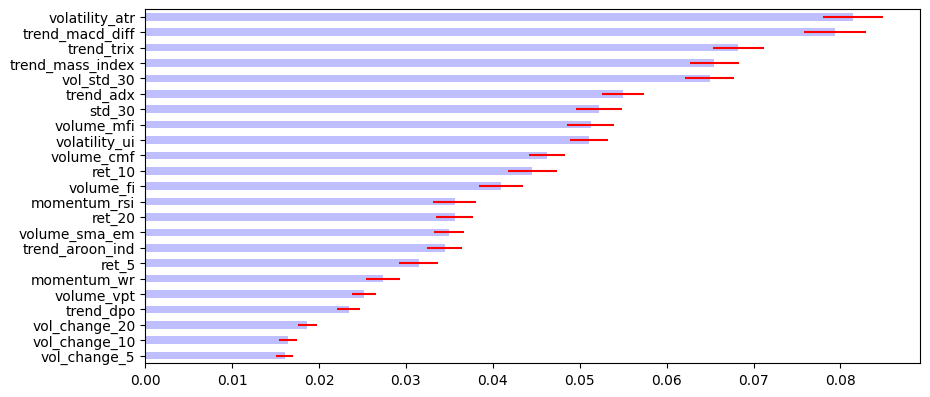

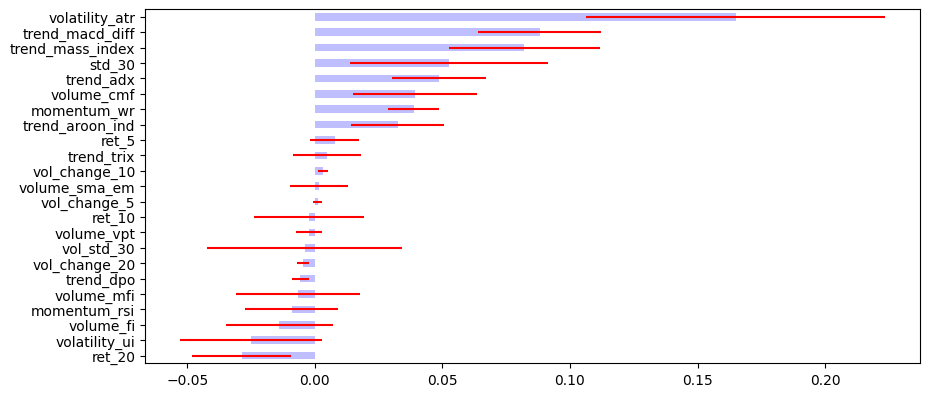

In [24]:
# Q. 코드를 작성해주세요

# feat_imp 확인
# plot_feature_importance('[[YOUR CODE]]')
plot_feature_importance(feat_imp)

# feat_imp_mda 확인
# plot_feature_importance('[[YOUR CODE]]')
plot_feature_importance(feat_imp_mda)

**RFE CV, Recursive Feature Elimination**

In [25]:
# Q. 코드를 작성해주세요

# RFE CV, Recursive Feature Elimination
svc_rbf = SVC(kernel='linear', probability=True)
# rfe_cv = #[[YOUR CODE]] # RFECV
rfe_cv = RFECV(svc_rbf, cv=cv)
# rfe_fitted = #[[YOUR CODE]] # fit
rfe_fitted = rfe_cv.fit(X_sc, y)

In [26]:
# 선택된 피쳐 확인하기

# [[Your Code]]
rfe_df = pd.DataFrame([rfe_fitted.support_, rfe_fitted.ranking_], columns=X_sc.columns).T.rename(columns={0:"Optimal_Features", 1:"Ranking"})
rfe_df

,Optimal_Features,Ranking
volume_cmf,False,12
volume_fi,False,4
volume_mfi,False,14
volume_sma_em,False,7
volume_vpt,False,8
volatility_atr,True,1
volatility_ui,False,11
trend_macd_diff,True,1
trend_adx,False,19
trend_trix,False,10


In [27]:
rfe_df[rfe_df["Optimal_Features"]==True]

,Optimal_Features,Ranking
volatility_atr,True,1
trend_macd_diff,True,1
std_30,True,1


**SFS, Sequential Feature Selection**

In [28]:
# SFS, Sequential Feature Selection

# n = [Your Code]
n = 2

sfs_forward = SequentialFeatureSelector(svc_rbf, n_features_to_select=n, direction='forward')
sfs_fitted = sfs_forward.fit(X_sc, y)

In [29]:
# 선택된 피쳐 확인하기

# [[Your Code]]
sfs_rank = sfs_fitted.get_support()
# sfs_df = pd.DataFrame(sfs_rank, index=X_sc.columns, columns={"Optimal_Features"})
sfs_df = pd.DataFrame(sfs_rank, index=X_sc.columns, columns=["Optimal_Features"])
sfs_df [sfs_df ["Optimal_Features"]==True].index

Index(['volume_mfi', 'trend_macd_diff'], dtype='object')

**SHAP, Shapley Additive explanations**

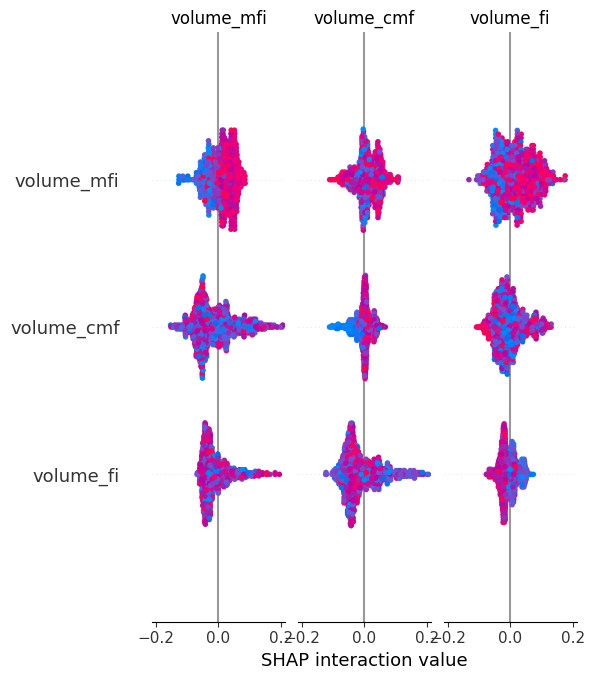

In [30]:
# Q. 코드를 작성해주세요

# SHAP, Shapley Additive explanations
import shap
explainer = shap.TreeExplainer(rfc)
shap_value = explainer.shap_values(X_sc)

# shap_value, X_sc 사용 shap.summary_plot 그리기
#[[YOUR CODE]]
shap.summary_plot(shap_value, X_sc)

### 3. 프로젝트 : Model Traning

--------------------------------------
**① 환경구성 및 데이터 불러오기**<br>
**② Purged K-fold for Cross-Validation적용하기**<br>
**③ Model 적용하기**

------------------------------------
#### ① 환경구성 및 데이터 불러오기

-------------------------------------

In [31]:
import datetime
import sys
import os
import re
import io
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

# sys.path.append('/aiffel/aiffel/fnguide/data/')
# sys.path.append('/aiffel/aiffel/08_time_series/fnguide/')
sys.path.append('/content/gdrive/MyDrive/aiffel/08_time_series/fnguide/')
from libs.mlutil.pkfold import PKFold

In [32]:
# 데이터 경로 설정 및 pickle 파일 불러오기
# DATA_PATH = '/aiffel/aiffel/fnguide/data/'
# DATA_PATH = '/aiffel/aiffel/08_time_series/fnguide/'
DATA_PATH = '/content/gdrive/MyDrive/aiffel/08_time_series/fnguide/'
data_file_name = os.path.join(DATA_PATH, 'sub_upbit_eth_min_feature_labels.pkl')
df_data = pd.read_pickle(data_file_name)

# 여기서부터 모델에 적용하기 위한 데이터 정제화를 시작합니다.
df_data['t_value'].value_counts()

# 데이터셋 비율 나누기
train_ratio, test_ratio = 0.7, 0.2
n_train = int(np.round(len(df_data) * train_ratio))
n_test = int(np.round(len(df_data) * test_ratio))

X, y = df_data.iloc[:, 5:-1], df_data.iloc[:, -1]

# standardzation
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# 데이터셋 분리
train_x, test_x, train_y, test_y = X_sc[:n_train, :], X_sc[-n_test:, :], y.iloc[:n_train], y.iloc[-n_test:]

train_x = pd.DataFrame(train_x, index=train_y.index, columns=X.columns)
train_y = pd.Series(train_y, index=train_y.index)
test_x = pd.DataFrame(test_x, index=test_y.index, columns=X.columns)
test_y = pd.Series(test_y, index=test_y.index)

# 학습 시간 단축을 위해 여기선 편의상 1000개의 데이터만 가져옵니다.
train_x = train_x[:1000] # 데이터셋을 증가 혹은 감소시켜 결과를 비교해봅시다.
train_y = train_y[:1000]

#### ② Purged K-fold for Cross-Validation적용하기

------------------------------------------------------

In [33]:
# Q. 코드를 작성해주세요

# n_cv = #[[YOUR CODE]] # 앞에서 지정한 값은 4입니다. 얼마를 넣을지 생각해보고 왜 이 값을 넣었는지에 대해서 설명해봅시다.
n_cv = 4
t1 = pd.Series(train_y.index.values, index=train_y.index)

# purged K-Fold
# cv = #[[YOUR CODE]]
cv = PKFold(n_cv, t1, 0)

③ Model 적용하기

------------------

In [34]:
# GridsearchCV에서 사용할 파라미터 설정합니다. 파라미터값을 바꿔보세요
# bc_params = {'n_estimators': [5, 10, 20],
#              'max_features': [0.5, 0.7],
#              'base_estimator__max_depth': [3,5,10,20],
#              'base_estimator__max_features': [None, 'auto'],
#              'base_estimator__min_samples_leaf': [3, 5, 10],
#              'bootstrap_features': [False, True]
#             }
bc_params = {
    'n_estimators': [5, 10, 20],
    'max_features': [0.5, 0.7],
    'estimator__max_depth': [3, 5, 10, 20],  # base_estimator → estimator
    'estimator__max_features': [None, 'auto'],  # base_estimator → estimator
    'estimator__min_samples_leaf': [3, 5, 10],  # base_estimator → estimator
    'bootstrap_features': [False, True]
}

In [35]:
# RandomForest 사용
rfc = RandomForestClassifier(class_weight='balanced')

In [36]:
# Q. 코드를 작성해주세요

# Bagging 적용
# bag_rfc = #[[YOUR CODE]]
bag_rfc = BaggingClassifier(rfc)

In [37]:
# Q. 코드를 작성해주세요

# GridSearchCV 적용
# gs_rfc = #[[YOUR CODE]]
gs_rfc = GridSearchCV(bag_rfc, bc_params, cv=cv, n_jobs=-1, verbose=1)

In [38]:
# fit
gs_rfc.fit(train_x, train_y)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


GridSearchCV(cv=PKFold(n_splits=4, pct_embargo=0,
    samples_info_sets=time
2018-01-01 00:43:00   2018-01-01 00:43:00
2018-01-01 00:44:00   2018-01-01 00:44:00
2018-01-01 00:45:00   2018-01-01 00:45:00
2018-01-01 00:46:00   2018-01-01 00:46:00
2018-01-01 00:47:00   2018-01-01 00:47:00
                              ...
2018-01-01 11:48:00   201...0   2018-01-01 11:51:00
2018-01-01 11:52:00   2018-01-01 11:52:00
Length: 670, dtype: datetime64[ns]),
             estimator=BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced')),
             n_jobs=-1,
             param_grid={'bootstrap_features': [False, True],
                         'estimator__max_depth': [3, 5, 10, 20],
                         'estimator__max_features': [None, 'auto'],
                         'estimator__min_samples_leaf': [3, 5, 10],
                         'max_features': [0.5, 0.7],
                         'n_estimators': [5, 10, 20]},
             verbose=1)

In [39]:
# best estimator
gs_rfc_best = gs_rfc.best_estimator_
gs_rfc_best.fit(train_x, train_y)

BaggingClassifier(estimator=RandomForestClassifier(class_weight='balanced',
                                                   max_depth=20,
                                                   max_features=None,
                                                   min_samples_leaf=10),
                  max_features=0.7, n_estimators=5)

In [40]:
# 예측값 확인
pred_y = gs_rfc_best.predict(test_x)
prob_y = gs_rfc_best.predict_proba(test_x)

In [41]:
# Q. 코드를 작성해주세요

# test_y, pred_y를 활용한 지표 적용
# confusion = #[[YOUR CODE]]
# accuracy  = #[[YOUR CODE]]
# precision = #[[YOUR CODE]]
# recall    = #[[YOUR CODE]]
confusion = confusion_matrix(test_y, pred_y)
accuracy  = accuracy_score(test_y, pred_y)
# precision = precision_score(test_y, pred_y)
# recall    = recall_score(test_y, pred_y)
precision = precision_score(test_y, pred_y, average='weighted')
recall    = recall_score(test_y, pred_y, average='weighted')

# 지표를 통한 결과 확인
print('================= confusion matrix ====================')
print(confusion)
print('=======================================================')
print(f'정확도:{accuracy}, 정밀도:{precision}, 재현율:{recall}')

================= confusion matrix ====================
[[38 14 27]
 [12 16 29]
 [ 0 10 45]]
정확도:0.518324607329843, 정밀도:0.5620154476180603, 재현율:0.518324607329843


In [42]:
# Q. 코드를 작성해주세요

# ROC curve 만들기
# fpr, tpr, thresholds = #[[YOUR CODE]]
fpr, tpr, thresholds = roc_curve(test_y, pred_y)
auc = roc_auc_score(test_y, pred_y)
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.xlabel('fpr')
plt.ylabel('tpr')
print(f'auc:{auc}')

ValueError: multiclass format is not supported

**해결 방법: 다중 클래스 문제에서는 각 클래스별 ROC 곡선을 개별적으로 계산**

**1. One-vs-Rest 방식**
각 클래스에 대해 이진화된 목표 값을 만들어 ROC 곡선을 계산

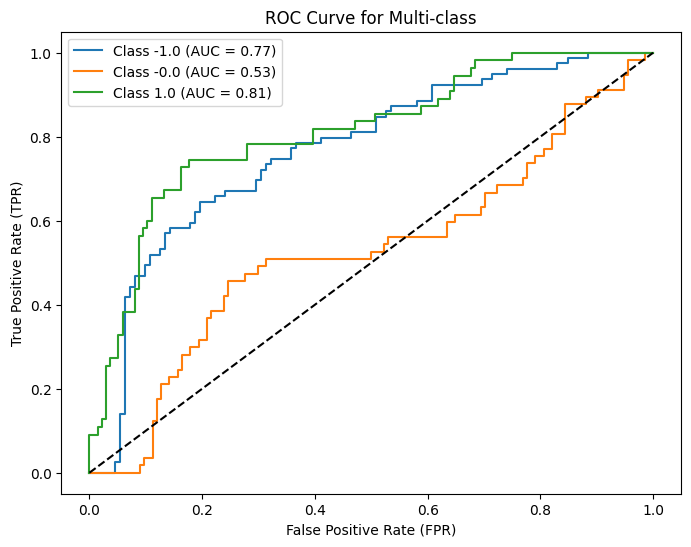

In [46]:
# 다중 클래스 이진화 (예: [0, 1, 2]를 원-핫 인코딩)
classes = sorted(set(test_y))
test_y_bin = label_binarize(test_y, classes=classes)
pred_y_prob = gs_rfc_best.predict_proba(test_x)  # 모델 예측 확률

# 각 클래스별 ROC Curve
plt.figure(figsize=(8, 6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(test_y_bin[:, i], pred_y_prob[:, i])
    auc = roc_auc_score(test_y_bin[:, i], pred_y_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc:.2f})')

# 그래프 꾸미기
plt.plot([0, 1], [0, 1], 'k--')  # 대각선 기준선
plt.title('ROC Curve for Multi-class')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='best')
plt.show()

**2. Macro 또는 Micro-averaging**
모든 클래스의 ROC 곡선을 평균내는 방법

In [47]:
from sklearn.metrics import roc_auc_score

# macro 평균 AUC
macro_auc = roc_auc_score(test_y_bin, pred_y_prob, average='macro', multi_class='ovr')
print(f'Macro-Averaged AUC: {macro_auc:.2f}')

# micro 평균 AUC
micro_auc = roc_auc_score(test_y_bin, pred_y_prob, average='micro', multi_class='ovr')
print(f'Micro-Averaged AUC: {micro_auc:.2f}')

Macro-Averaged AUC: 0.70
Micro-Averaged AUC: 0.67
